In [7]:
'''                                                                     
1. Load and normalizeing the CIFAR10 training and test datasets using torchvision
2. Define a Convolutional Neural Network                                
3. Define a loss function                                               
4. Train the network on the training data                               
5. Test the network on the test data                                    
'''                                                                     
                                                                        
# Reference: Pytorch Tutorial 60 minute Blitz, Training a classifier    
# Link: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
                                                                        
import torch                                                            
import torchvision                                                      
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
#Transforming and loading data                                                                
transform = transforms.Compose( [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
                                                                        
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
                                                                        
classes =('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [9]:
def imshow(img):
    img = img/2+0.5 #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

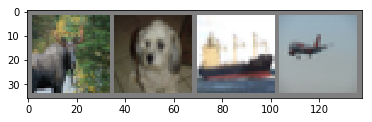

 deer   dog  ship plane


In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [16]:
net = Net()

In [17]:
#Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [20]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #get the inputs
        inputs, labels = data
        
        #zero the parameter gradients
        optimizer.zero_grad()
        
        #forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #print statistics
        running_loss += loss.item()
        if i%2000 == 1999: #print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f'%(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

print ('Finished Training')
        

[1,  2000] loss: 1.761
[1,  4000] loss: 1.612
[1,  6000] loss: 1.531
[1,  8000] loss: 1.479
[1, 10000] loss: 1.409
[1, 12000] loss: 1.394
[2,  2000] loss: 1.309
[2,  4000] loss: 1.314
[2,  6000] loss: 1.269
[2,  8000] loss: 1.244
[2, 10000] loss: 1.247
[2, 12000] loss: 1.221
Finished Training


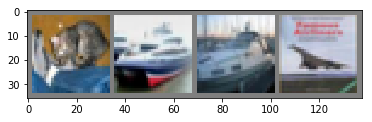

Ground Truth:    cat  ship  ship plane
Predicted:    dog   dog horse  bird


In [22]:
dataiter = iter(testloader)
images, labels = dataiter.next()

#print images
imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [23]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [24]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 77 %
Accuracy of  bird : 45 %
Accuracy of   cat : 35 %
Accuracy of  deer : 47 %
Accuracy of   dog : 36 %
Accuracy of  frog : 76 %
Accuracy of horse : 58 %
Accuracy of  ship : 69 %
Accuracy of truck : 65 %


In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


In [26]:
net.to(device)
inputs, labels = inputs.to(device), labels.to(device)